# Model 1: Random Forest

## Random Forest Baseline

Accuracy: 0.8030432522445528
AUC Score: 0.7760786836137405

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     89995
           1       0.58      0.17      0.26     23502

    accuracy                           0.80    113497
   macro avg       0.70      0.57      0.57    113497
weighted avg       0.77      0.80      0.76    113497



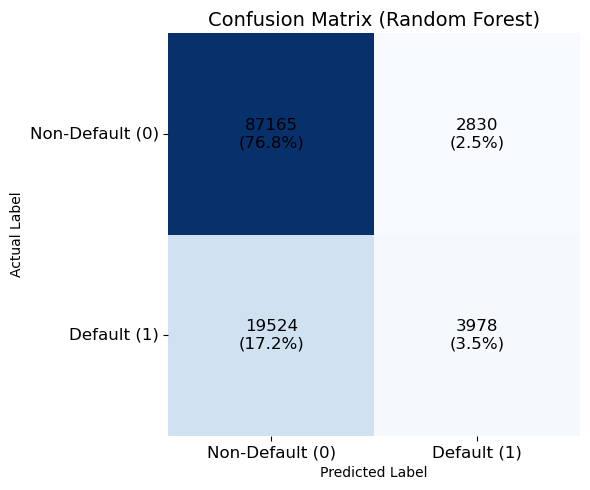

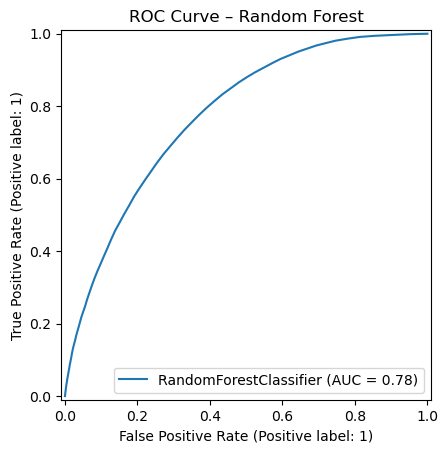

In [249]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    classification_report, confusion_matrix, RocCurveDisplay
)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum * 100

# Create annotation labels as "count\n(%)"
labels = np.array([
    [f"{count}\n({perc:.1f}%)" for count, perc in zip(row_counts, row_percents)]
    for row_counts, row_percents in zip(cm, cm_percent)
])

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
            annot_kws={"fontsize": 12, "color": "black"})

plt.title("Confusion Matrix (Random Forest)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks([0.5, 1.5], ['Non-Default (0)', 'Default (1)'], fontsize=12)
plt.yticks([0.5, 1.5], ['Non-Default (0)', 'Default (1)'], rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve – Random Forest")
plt.show()


## Random Forest Baseline (Threshold Tuning)

### Plot Metrics for Multiple Thresholds

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


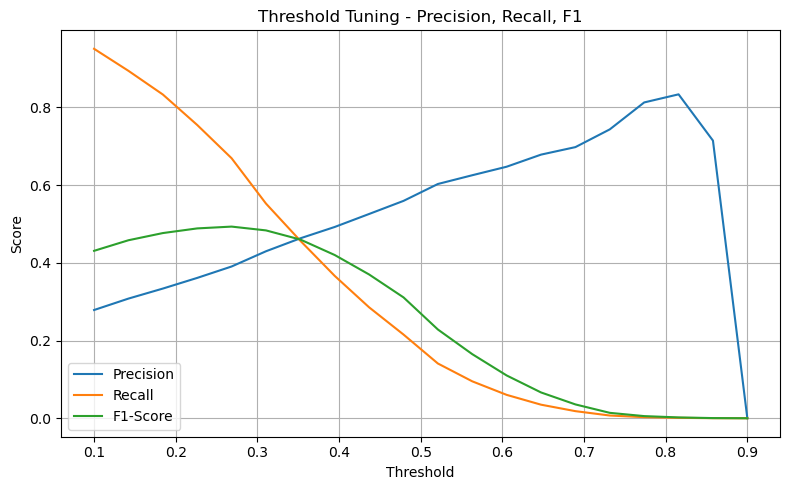

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0.1, 0.9, 20)
precision = []
recall = []
f1 = []

for t in thresholds:
    y_t = (y_proba >= t).astype(int)
    precision.append(precision_score(y_test, y_t))
    recall.append(recall_score(y_test, y_t))
    f1.append(f1_score(y_test, y_t))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, f1, label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning - Precision, Recall, F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="line-height: 1.6;">
To enhance the model’s ability to detect loan defaults, we performed threshold tuning by analyzing the trade-off between precision, recall, and F1-score across a range of classification thresholds. While the default threshold of 0.5 yielded high precision, it resulted in very low recall — meaning the model failed to identify a large number of actual defaults, which is undesirable for risk management purposes.
</div>
<br>
<div style="line-height: 1.6;">
As illustrated in the Precision-Recall-F1 plot, the F1-score peaks around a threshold of 0.25–0.3, suggesting an optimal balance between catching defaulters and minimizing false alarms. However, to further prioritize the identification of defaults, we intentionally selected a lower threshold of 0.2. This more conservative strategy increases the recall rate, allowing the model to capture more actual defaulters — even at the cost of reduced precision.
</div>
<br>
<div style="line-height: 1.6;">
By lowering the threshold to 0.2, we accept a higher number of false positives in exchange for better coverage of risky loans. This approach aligns with the goal of minimizing missed defaulters, especially in financial settings where failing to flag high-risk loans may carry higher costs than mistakenly flagging safe ones.

### Evaluate the Model

Classification report at threshold 0.2:
Accuracy: 0.8030432522445528
AUC Score: 0.7790467978087967
              precision    recall  f1-score   support

           0       0.92      0.59      0.72     89995
           1       0.34      0.81      0.48     23502

    accuracy                           0.63    113497
   macro avg       0.63      0.70      0.60    113497
weighted avg       0.80      0.63      0.67    113497



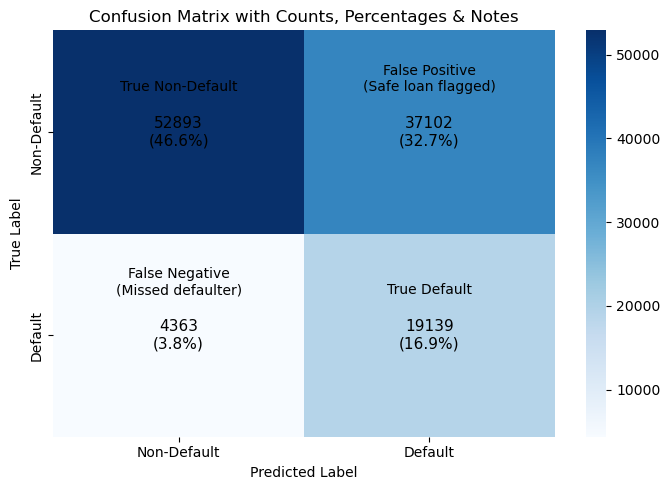

AUC Score: 0.7761


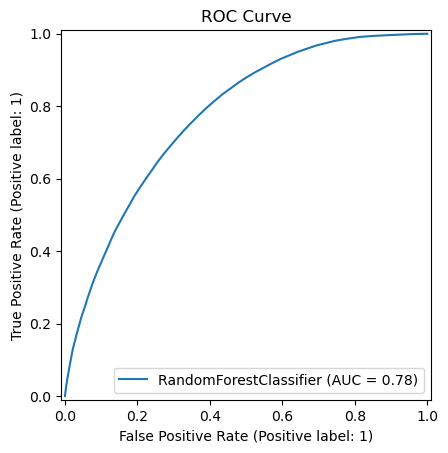

In [255]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Classification Report
# ---------------------------
print(f"Classification report Baseline Random Forest at threshold {threshold}:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_custom))

# ---------------------------
# 2. Confusion Matrix with % and Notes
# ---------------------------
cm = confusion_matrix(y_test, y_pred_custom)
labels = ['Non-Default', 'Default']
total = np.sum(cm)

# Calculate percentages
cm_percent = cm / total * 100
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = cm_percent[i, j]
        annot[i, j] = f"{count}\n({percent:.1f}%)"

plt.figure(figsize=(7, 5))
ax = sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
                 xticklabels=labels, yticklabels=labels,
                 annot_kws={"color": "black", "fontsize": 11})

# Add labels and title
plt.title("Confusion Matrix with Counts, Percentages & Notes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add in-plot explanations for each quadrant
ax.text(0.5, 0.3, 'True Non-Default', color='black', ha='center', fontsize=10)
ax.text(1.5, 0.3, 'False Positive\n(Safe loan flagged)', color='black', ha='center', fontsize=10)
ax.text(0.5, 1.3, 'False Negative\n(Missed defaulter)', color='black', ha='center', fontsize=10)
ax.text(1.5, 1.3, 'True Default', color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ---------------------------
# 3. AUC Score
# ---------------------------
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# ---------------------------
# 4. ROC Curve
# ---------------------------
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


## Random Forest Class Weighting

Evaluation for Class-Weighted Model
Accuracy: 0.8020828744372098
AUC Score: 0.7790467978087967

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89     89995
           1       0.59      0.15      0.24     23502

    accuracy                           0.80    113497
   macro avg       0.70      0.56      0.56    113497
weighted avg       0.77      0.80      0.75    113497



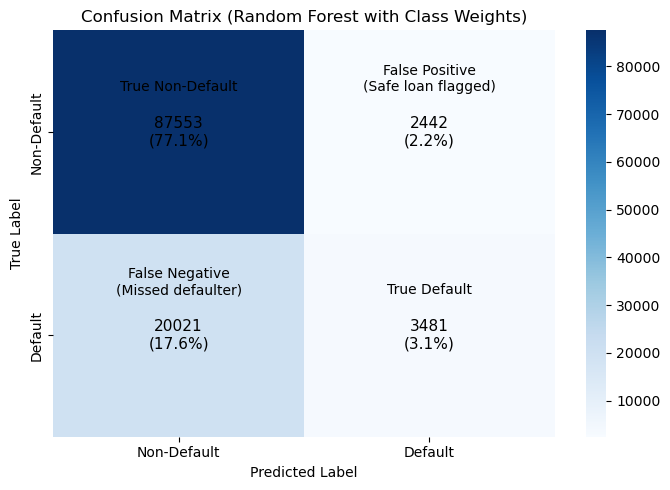

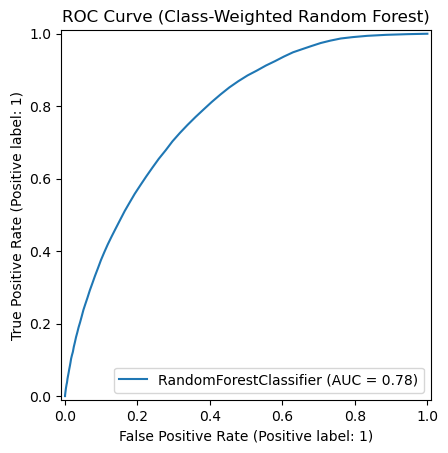

In [265]:
# Evaluation for Class-Weighted Random Forest Model

from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    RocCurveDisplay, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------------------------------
# Use the class-weighted model (important!)
# -----------------------------------------------------
y_pred = model_weighted.predict(X_test)
y_prob = model_weighted.predict_proba(X_test)[:, 1]

# -----------------------------------------------------
# Evaluation Metrics
# -----------------------------------------------------
print("Evaluation for Class-Weighted Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------------------------------
# Confusion Matrix (with Percentages and Annotations)
# -----------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
labels = ['Non-Default', 'Default']
total = cm.sum()

# Add counts + percentages in the cells
cm_percent = cm / total * 100
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = cm_percent[i, j]
        annot[i, j] = f"{count}\n({percent:.1f}%)"

plt.figure(figsize=(7, 5))
ax = sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
                 xticklabels=labels, yticklabels=labels,
                 annot_kws={"color": "black", "fontsize": 11})

plt.title("Confusion Matrix (Random Forest with Class Weights)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Quadrant explanations
ax.text(0.5, 0.3, 'True Non-Default', color='black', ha='center', fontsize=10)
ax.text(1.5, 0.3, 'False Positive\n(Safe loan flagged)', color='black', ha='center', fontsize=10)
ax.text(0.5, 1.3, 'False Negative\n(Missed defaulter)', color='black', ha='center', fontsize=10)
ax.text(1.5, 1.3, 'True Default', color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# ROC Curve for Class-Weighted Model
# -----------------------------------------------------
RocCurveDisplay.from_estimator(model_weighted, X_test, y_test)
plt.title("ROC Curve (Class-Weighted Random Forest)")
plt.show()

## Random Forest Class Weighting (Threshold Tuning)

### Plot Metrics for Multiple Thresholds

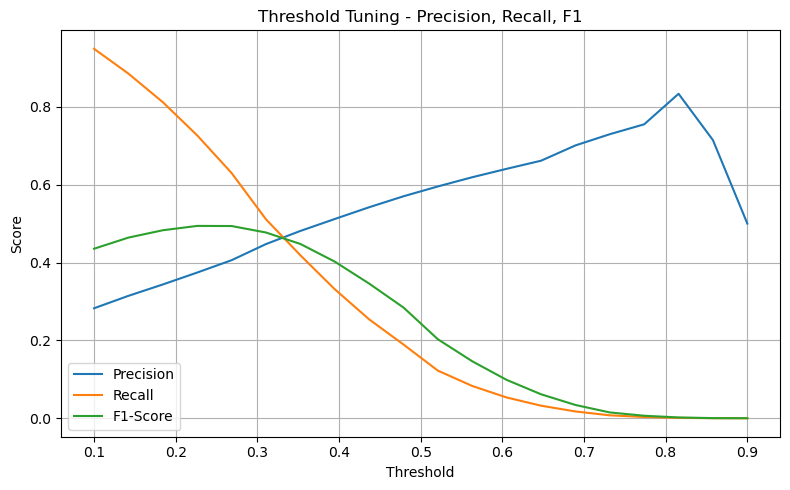

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0.1, 0.9, 20)
precision = []
recall = []
f1 = []

for t in thresholds:
    y_t = (y_proba >= t).astype(int)
    precision.append(precision_score(y_test, y_t))
    recall.append(recall_score(y_test, y_t))
    f1.append(f1_score(y_test, y_t))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, f1, label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning - Precision, Recall, F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="line-height: 1.6;">
To enhance the model’s ability to detect loan defaults, we performed threshold tuning by analyzing the trade-off between precision, recall, and F1-score across a range of classification thresholds. While the default threshold of 0.5 yielded high precision, it resulted in very low recall — meaning the model failed to identify a large number of actual defaults, which is undesirable for risk management purposes.
</div>
<br>
<div style="line-height: 1.6;">
As illustrated in the Precision-Recall-F1 plot, the F1-score peaks around a threshold of 0.25–0.3, suggesting an optimal balance between catching defaulters and minimizing false alarms. However, to further prioritize the identification of defaults, we intentionally selected a lower threshold of 0.2. This more conservative strategy increases the recall rate, allowing the model to capture more actual defaulters — even at the cost of reduced precision.
</div>
<br>
<div style="line-height: 1.6;">
By lowering the threshold to 0.2, we accept a higher number of false positives in exchange for better coverage of risky loans. This approach aligns with the goal of minimizing missed defaulters, especially in financial settings where failing to flag high-risk loans may carry higher costs than mistakenly flagging safe ones.

### Evaluate the Model

Classification report at threshold 0.2:
Accuracy: 0.8020828744372098
AUC Score: 0.7790467978087967
              precision    recall  f1-score   support

           0       0.92      0.62      0.74     89995
           1       0.35      0.79      0.49     23502

    accuracy                           0.65    113497
   macro avg       0.63      0.70      0.61    113497
weighted avg       0.80      0.65      0.69    113497



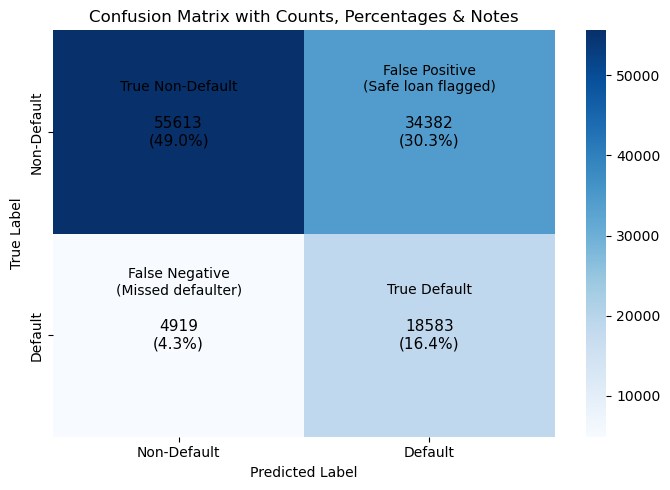

AUC Score: 0.7790


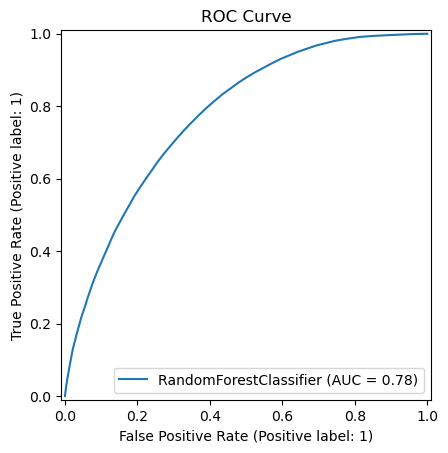

In [271]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Classification Report
# ---------------------------
print(f"Classification report Class Weighted Model at threshold {threshold}:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_custom))

# ---------------------------
# 2. Confusion Matrix with % and Notes
# ---------------------------
cm = confusion_matrix(y_test, y_pred_custom)
labels = ['Non-Default', 'Default']
total = np.sum(cm)

# Calculate percentages
cm_percent = cm / total * 100
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = cm_percent[i, j]
        annot[i, j] = f"{count}\n({percent:.1f}%)"

plt.figure(figsize=(7, 5))
ax = sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
                 xticklabels=labels, yticklabels=labels,
                 annot_kws={"color": "black", "fontsize": 11})

# Add labels and title
plt.title("Confusion Matrix with Counts, Percentages & Notes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add in-plot explanations for each quadrant
ax.text(0.5, 0.3, 'True Non-Default', color='black', ha='center', fontsize=10)
ax.text(1.5, 0.3, 'False Positive\n(Safe loan flagged)', color='black', ha='center', fontsize=10)
ax.text(0.5, 1.3, 'False Negative\n(Missed defaulter)', color='black', ha='center', fontsize=10)
ax.text(1.5, 1.3, 'True Default', color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ---------------------------
# 3. AUC Score
# ---------------------------
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# ---------------------------
# 4. ROC Curve
# ---------------------------
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


## Methodologies (Section 3)

<div style="line-height: 1.6;">
In this analysis, we define loan default as any loan with a status of 'Charged Off' or 'Default'. These are labeled as 1in our binary target variable, while all other loans (primarily 'Fully Paid') are labeled as 0 (non-default).
</div>
<br>
<div style="line-height: 1.6;">
To avoid data leakage, we carefully excluded post-loan outcome variables that would not be available at the time of investment. This included categorical features like loan_status and other indicators such as recoveries, and engineered return columns like ret_PESS, ret_OPT, and related return fields. These were removed prior to training to ensure the model was only learning from pre-loan application information.
</div>
<br>
<div style="line-height: 1.6;">
We also dropped rows containing missing values. This decision was made to maintain model integrity and avoid complications from imputation methods, especially since some missing values appeared in key variables like emp_length. Removing these rows ensured consistency across training and evaluation without introducing bias from artificial estimates.
The modeling process was conducted in four stages to incrementally address performance and class imbalance.

1. Baseline Random Forest
We first trained a standard Random Forest classifier using default hyperparameters. The dataset was split into an 80/20 train-test split, with categorical features one-hot encoded. This baseline model was evaluated using accuracy, AUC, and classification metrics. While it performed well overall, it showed poor recall on the minority class (defaults), indicating it failed to detect many actual defaulters.
2. Baseline + Threshold Tuning
To address the low recall, we applied threshold tuning by lowering the classification threshold from 0.5 to 0.2. This adjustment improved the model's sensitivity to defaults, significantly increasing recall. Though this came with a drop in precision (more false positives), the trade-off aligned with our objective of minimizing missed defaults.
3. Class-Weighted Random Forest
Next, we addressed class imbalance by using class_weight='balanced' in the Random Forest. This automatically assigned weights inversely proportional to class frequencies. In our dataset, this resulted in:
    + Class 0 (Non-default): ~0.63
    + Class 1 (Default): ~2.41
<div style="line-height: 1.6;">These weights gave more influence to the minority class during training. However, while precision slightly improved, recall remained low, showing that class weighting alone was not enough.
4. Class-Weighted + Threshold Tuning
Finally, we combined class weighting with threshold tuning. Applying a 0.2 threshold again led to a substantial increase in recall, similar to the tuned baseline model. This version maintained the benefits of class weighting while achieving better detection of defaulters.

## experiments details, explain the results, and the implications of your findings (Section 5)

| **Model**                  | **Recall (Default)** | **Precision (Default)** | **Recall (Non-Default)** | **Precision (Non-Default)** | **AUC** |
|---------------------------|----------------------|--------------------------|---------------------------|------------------------------|---------|
| Baseline                  | 0.17                 | 0.58                     | 0.97                      | 0.82                         | 0.776   |
| Threshold-Tuned Baseline  | **0.81**             | 0.34                     | 0.59                      | 0.92                         | 0.776   |
| Class-Weighted            | 0.15                 | 0.59                     | 0.97                      | 0.81                         | 0.779   |
| Threshold-Tuned Weighted  | **0.79**             | 0.35                     | 0.62                      | 0.92                         | 0.779   |


<div style="line-height: 1.6;">
To address the class imbalance, we evaluated four Random Forest variants: baseline, threshold-tuned baseline, class-weighted, and threshold-tuned class-weighted. The baseline model performed well at identifying non-defaults but poorly at detecting defaulters, shown by its low recall.
</div>
<br>
<div style="line-height: 1.6;">
To improve this, we applied threshold tuning by lowering the classification threshold to 0.2. This significantly increased recall from 0.17 to 0.81, capturing more defaulters at the cost of reduced precision—an acceptable trade-off for minimizing undetected risk.
We also tested class weighting, which emphasized defaults using computed weights (≈2.41 for defaults, 0.63 for non-defaults). However, weighting alone did not meaningfully improve recall.
</div>
<br>
<div style="line-height: 1.6;">
Threshold tuning applied to the weighted model achieved similar recall to the tuned baseline, confirming that threshold adjustment had the greatest impact. We selected the threshold-tuned baseline model as the final choice due to its slightly higher recall, with the weighted variant as a close alternative.
</div>
<br>
<div style="line-height: 1.6;">
Despite strong performance, the model has limitations. Improved recall came with more false positives, which may lead to missed investment opportunities. Additionally, Random Forests lack transparency, making explanations harder.
</div>
<br>
<div style="line-height: 1.6;">
To build on this analysis, future work could explore models that are easier to interpret, helping explain why certain loans are flagged as risky. It could also be valuable to include borrower behavior over time or external factors like economic conditions. While this report compares individual models such as Random Forest and ANN, future studies could combine their strengths through ensemble methods to further improve prediction accuracy. Lastly, adjusting the model to account for the real-world cost of misclassifying loans—such as mistakenly approving a high-risk borrower—could make the predictions more applicable in practice.

# Appendix

# Random Forest Baseline

## 0. Load and Preview Data

In [3]:
# Import libraries
import pandas as pd

# Load the .pickle file
data = pd.read_pickle('lending_club_dataset.pickle')

# Extract the actual DataFrame (it's in the first item of the list)
df = data[0]

# Optional: extract metadata (categorical/numerical lists)
categorical_cols = data[1]
numerical_cols = data[2]

# Preview first few rows
df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt,last_pymnt_d,recoveries,loan_length,term_num,ret_PESS,ret_OPT,ret_INTa,ret_INTb,ret_INTc
0,40390412,5000.0,5000.0,36 months,12.39,167.01,C,< 1 year,RENT,48000.0,...,5475.14000,2015-12-01,0.0,10.973531,36,0.031676,0.103917,0.031155,0.050634,0.086751
2,40401108,17000.0,17000.0,36 months,12.39,567.82,C,1 year,RENT,53000.0,...,20452.09912,2018-03-01,0.0,37.947391,36,0.067688,0.064215,0.050574,0.066334,0.094950
3,40501689,9000.0,9000.0,36 months,14.31,308.96,C,6 years,RENT,39000.0,...,9792.56000,2015-11-01,0.0,9.987885,36,0.029354,0.105803,0.029798,0.049345,0.085622
4,40352737,14000.0,14000.0,36 months,11.99,464.94,B,6 years,RENT,44000.0,...,16592.91130,2018-01-01,0.0,36.008953,36,0.061736,0.061721,0.047093,0.063007,0.091937
5,40431323,10000.0,10000.0,60 months,19.24,260.73,E,10+ years,MORTGAGE,130000.0,...,15122.07997,2018-10-01,0.0,44.978336,60,0.102442,0.136655,0.113866,0.131897,0.164518


## 1. Define Target Variable (default)

In [16]:
# Define the binary target: 1 = defaulted, 0 = not defaulted
df['default'] = df['loan_status'].apply(
    lambda x: 1 if x in ['Charged Off', 'Default'] else 0
)

## 2. Convert 'issue_d' to Datetime and Create Features

In [18]:
from datetime import datetime

# Convert 'issue_d' to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')

# Create new features from it
df['issue_year'] = df['issue_d'].dt.year
df['loan_age_months'] = (datetime.today() - df['issue_d']).dt.days // 30

# Drop original 'issue_d' to avoid issues later
df = df.drop(columns=['issue_d'])

## 3. Drop Unnecessary or Leaky Columns

In [241]:
columns_to_drop = [
    'id', 'member_id', 'loan_status',           # identifiers or target
    'recoveries', 'total_pymnt', 'last_pymnt_d', 'months_since_last_payment',  # post-loan info
    'ret_PESS', 'ret_OPT', 'ret_INTa', 'ret_INTb', 'ret_INTc',  # not allowed
    'predicted_prob'  # could be an issue if re-running model
]

# Drop only if the column exists (safe execution)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

## 4. Drop Rows with Missing Values

In [22]:
# Check shape before and after dropping missing values
print("Before dropping NA:", df.shape)
df = df.dropna()
print("After dropping NA:", df.shape)

Before dropping NA: (605374, 25)
After dropping NA: (567483, 25)


## 5. One-Hot Encode Categorical Variables

In [211]:
# List of known categorical columns
categorical_cols = ['home_ownership', 'grade', 'emp_length', 'purpose', 'verification_status', 'term']

# One-hot encode with drop_first=True to avoid multicollinearity
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

KeyError: "None of [Index(['home_ownership', 'grade', 'emp_length', 'purpose',\n       'verification_status', 'term'],\n      dtype='object')] are in the [columns]"

## 6. Define Features and Target

In [243]:
# Define X and y
X = df.drop(columns=['default'])
y = df['default']

## Converting Object into datetime (do this before step 7 & 8)

### (i) Converting object into datetime

In [42]:
X.dtypes[X.dtypes.apply(lambda x: x == 'object' or 'date' in str(x).lower())]

earliest_cr_line    object
dtype: object

In [44]:
from datetime import datetime

# ----------------------------------------
# 1. Convert 'earliest_cr_line' to datetime
# ----------------------------------------
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

# Create feature: borrower's credit history length in years
df['credit_history_years'] = datetime.today().year - df['earliest_cr_line'].dt.year

# Drop original column
df = df.drop(columns=['earliest_cr_line'])


In [46]:
X.dtypes[X.dtypes.apply(lambda x: x == 'object' or 'date' in str(x).lower())]

earliest_cr_line    object
dtype: object

### (ii) Updating X

In [50]:
X = df.drop(columns=['default'])
y = df['default']

## 7. Train-Test Split

In [245]:
from sklearn.model_selection import train_test_split

# 80/20 split with stratify for class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## 8. Train a Random Forest Classifier

In [247]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 9. Evaluate the Model

Accuracy: 0.8030432522445528
AUC Score: 0.7760786836137405

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     89995
           1       0.58      0.17      0.26     23502

    accuracy                           0.80    113497
   macro avg       0.70      0.57      0.57    113497
weighted avg       0.77      0.80      0.76    113497



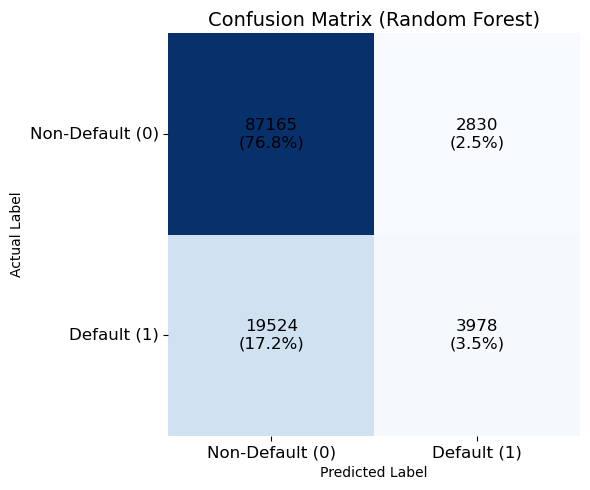

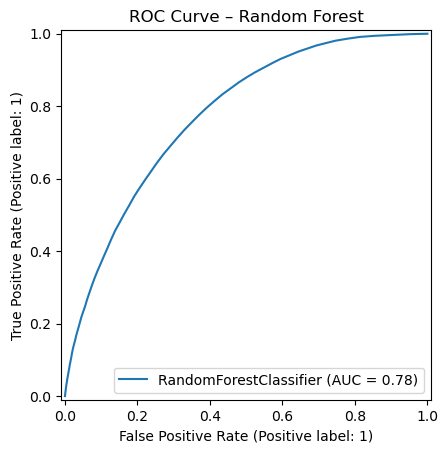

In [249]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    classification_report, confusion_matrix, RocCurveDisplay
)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum * 100

# Create annotation labels as "count\n(%)"
labels = np.array([
    [f"{count}\n({perc:.1f}%)" for count, perc in zip(row_counts, row_percents)]
    for row_counts, row_percents in zip(cm, cm_percent)
])

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
            annot_kws={"fontsize": 12, "color": "black"})

plt.title("Confusion Matrix (Random Forest)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks([0.5, 1.5], ['Non-Default (0)', 'Default (1)'], fontsize=12)
plt.yticks([0.5, 1.5], ['Non-Default (0)', 'Default (1)'], rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve – Random Forest")
plt.show()


## Treshold Tuning for Baseline RandomForest

### 1. Predict Probabilities

In [251]:
# Predict class probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # probability of default (class 1)

### 2. Apply Custom Threshold

In [253]:
# Custom threshold
threshold = 0.2

# Convert probabilities to 0 or 1
y_pred_custom = (y_proba >= threshold).astype(int)

### 3. Evaluate New Prediction

Classification report at threshold 0.2:
Accuracy: 0.8030432522445528
AUC Score: 0.7790467978087967
              precision    recall  f1-score   support

           0       0.92      0.59      0.72     89995
           1       0.34      0.81      0.48     23502

    accuracy                           0.63    113497
   macro avg       0.63      0.70      0.60    113497
weighted avg       0.80      0.63      0.67    113497



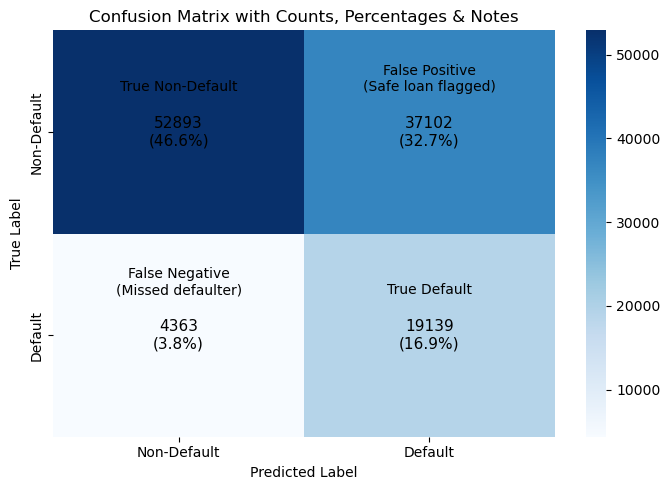

AUC Score: 0.7761


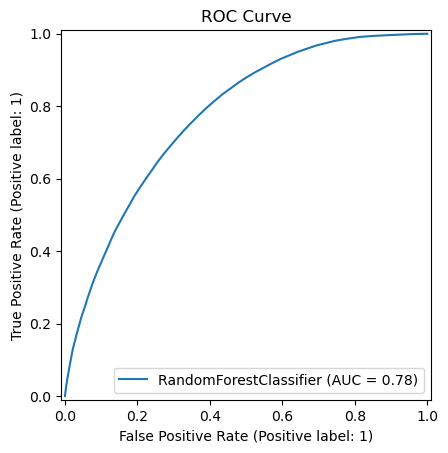

In [255]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Classification Report
# ---------------------------
print(f"Classification report Baseline Random Forest at threshold {threshold}:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_custom))

# ---------------------------
# 2. Confusion Matrix with % and Notes
# ---------------------------
cm = confusion_matrix(y_test, y_pred_custom)
labels = ['Non-Default', 'Default']
total = np.sum(cm)

# Calculate percentages
cm_percent = cm / total * 100
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = cm_percent[i, j]
        annot[i, j] = f"{count}\n({percent:.1f}%)"

plt.figure(figsize=(7, 5))
ax = sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
                 xticklabels=labels, yticklabels=labels,
                 annot_kws={"color": "black", "fontsize": 11})

# Add labels and title
plt.title("Confusion Matrix with Counts, Percentages & Notes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add in-plot explanations for each quadrant
ax.text(0.5, 0.3, 'True Non-Default', color='black', ha='center', fontsize=10)
ax.text(1.5, 0.3, 'False Positive\n(Safe loan flagged)', color='black', ha='center', fontsize=10)
ax.text(0.5, 1.3, 'False Negative\n(Missed defaulter)', color='black', ha='center', fontsize=10)
ax.text(1.5, 1.3, 'True Default', color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ---------------------------
# 3. AUC Score
# ---------------------------
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# ---------------------------
# 4. ROC Curve
# ---------------------------
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


### 4. Plot Metrics for Multiple Thresholds

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


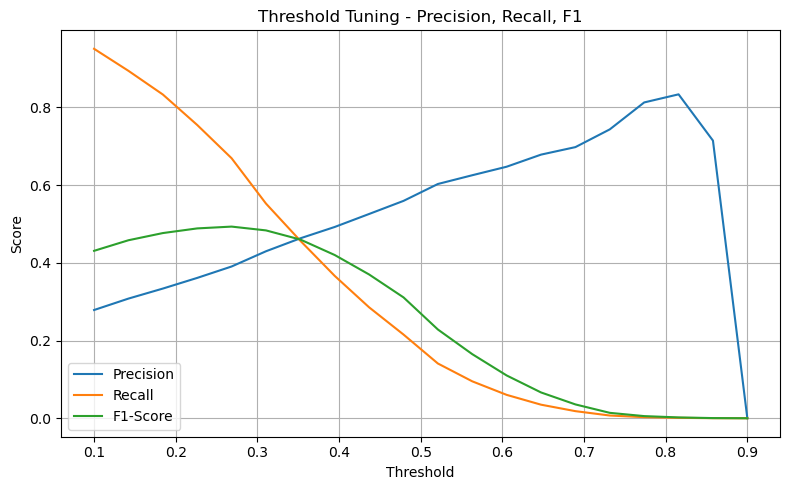

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0.1, 0.9, 20)
precision = []
recall = []
f1 = []

for t in thresholds:
    y_t = (y_proba >= t).astype(int)
    precision.append(precision_score(y_test, y_t))
    recall.append(recall_score(y_test, y_t))
    f1.append(f1_score(y_test, y_t))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, f1, label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning - Precision, Recall, F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="line-height: 1.6;">
To enhance the model’s ability to detect loan defaults, we performed threshold tuning by analyzing the trade-off between precision, recall, and F1-score across a range of classification thresholds. While the default threshold of 0.5 yielded high precision, it resulted in very low recall — meaning the model failed to identify a large number of actual defaults, which is undesirable for risk management purposes.
</div>
<br>
<div style="line-height: 1.6;">
As illustrated in the Precision-Recall-F1 plot, the F1-score peaks around a threshold of 0.25–0.3, suggesting an optimal balance between catching defaulters and minimizing false alarms. However, to further prioritize the identification of defaults, we intentionally selected a lower threshold of 0.2. This more conservative strategy increases the recall rate, allowing the model to capture more actual defaulters — even at the cost of reduced precision.
</div>
<br>
<div style="line-height: 1.6;">
By lowering the threshold to 0.2, we accept a higher number of false positives in exchange for better coverage of risky loans. This approach aligns with the goal of minimizing missed defaulters, especially in financial settings where failing to flag high-risk loans may carry higher costs than mistakenly flagging safe ones.

# Select N Safest Loans

In [123]:
# Predict probability of default for all loans
df['predicted_prob'] = model.predict_proba(X)[:, 1]

# Select N loans with the lowest predicted default risk
N = 100
safe_loans = df.sort_values(by='predicted_prob').head(N)

# Format predicted_prob to show more decimal places (e.g., 6)
safe_loans['predicted_prob'] = safe_loans['predicted_prob'].apply(lambda x: f"{x:.6f}")

# Preview the safest loans
safe_loans[['loan_amnt', 'int_rate', 'predicted_prob']].head()

,loan_amnt,int_rate,predicted_prob
342146,30000.0,9.99,0.000000
342148,5775.0,12.59,0.000000
796882,1400.0,7.35,0.000000
796940,17000.0,11.99,0.000000
57266,35000.0,9.49,0.000000


<div style="line-height: 1.6;">
In this project, we simulate the role of a Lending Club investor who must choose a subset of loans to invest in. Rather than funding all available loans, we use our model to build a portfolio of the safest (or highest-returning) loans based on predicted outcomes. This allows us to evaluate the model’s usefulness in supporting investment decisions and assess its impact on actual portfolio performance.

<div style="line-height: 1.6;">
This approach prioritizes loans the model is most confident will not default. While the value of N (100) is an arbitrary choice in this analysis, it serves as a clear example of how the model's output can be used to construct a customized portfolio of safe loans.
</div>
<br>
<div style="line-height: 1.6;">
In practical applications, N could be adjusted based on the investor’s risk appetite, investment size, or performance trade-offs (e.g., interest rates vs. predicted risk). Future work could expand this analysis by evaluating the effect of different N values or applying a threshold-based selection method (e.g., loans with predicted risk < 1%).

<div style="line-height: 1.6;">
For the default minimization strategy, we used the baseline Random Forest model to select the N safest loans. While our threshold-tuned model achieved superior recall, the baseline model demonstrated higher precision for identifying non-defaults, making it more reliable for constructing a portfolio focused on safety. We ranked all loans by their predicted probability of default and selected the N loans with the lowest values.

In [60]:
safe_loans.to_csv('safe_loans_portfolio.csv', index=False)
print("Saved portfolio to 'safe_loans_portfolio.csv'")

Saved portfolio to 'safe_loans_portfolio.csv'


# Random Forest Class Weighting

## Dropping predicted_prob (in case of rerunning the model)

In [259]:
columns_to_drop = [
    'id', 'member_id', 'loan_status',           # identifiers or target
    'recoveries', 'total_pymnt', 'last_pymnt_d', 'months_since_last_payment',  # post-loan info
    'ret_PESS', 'ret_OPT', 'ret_INTa', 'ret_INTb', 'ret_INTc',  # not allowed
    'predicted_prob'  # if it exists from earlier predictions
]

# Drop only if the column exists (safe execution)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

## 1. Compute Class Weights

In [261]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Automatically calculate weights for class 0 and 1
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Create dictionary format for the classifier
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.6305728945299587, 1: 2.414639335368643}


## 2. Train the Random Forest with class_weight

In [263]:
from sklearn.ensemble import RandomForestClassifier

model_weighted = RandomForestClassifier(
    random_state=42,
    class_weight=class_weight_dict
)

model_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.6305728945299587,
                                     1: 2.414639335368643},
                       random_state=42)

## 3. Evaluate the Model

Evaluation for Class-Weighted Model
Accuracy: 0.8020828744372098
AUC Score: 0.7790467978087967

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89     89995
           1       0.59      0.15      0.24     23502

    accuracy                           0.80    113497
   macro avg       0.70      0.56      0.56    113497
weighted avg       0.77      0.80      0.75    113497



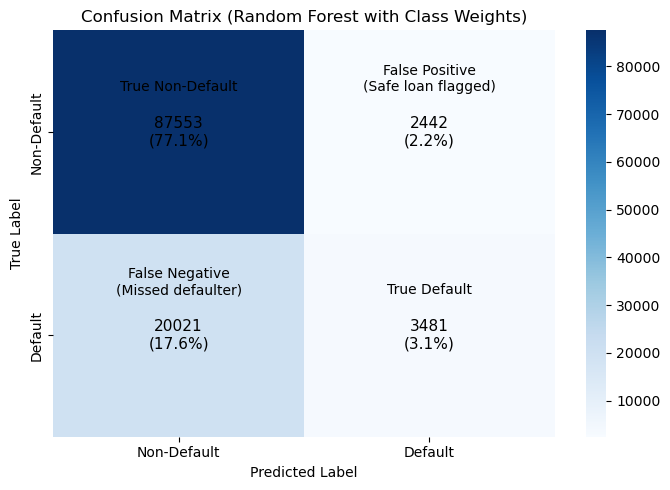

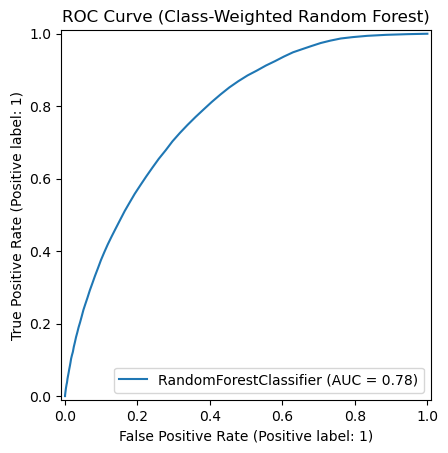

In [265]:
# Evaluation for Class-Weighted Random Forest Model

from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    RocCurveDisplay, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------------------------------
# Use the class-weighted model (important!)
# -----------------------------------------------------
y_pred = model_weighted.predict(X_test)
y_prob = model_weighted.predict_proba(X_test)[:, 1]

# -----------------------------------------------------
# Evaluation Metrics
# -----------------------------------------------------
print("Evaluation for Class-Weighted Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------------------------------
# Confusion Matrix (with Percentages and Annotations)
# -----------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
labels = ['Non-Default', 'Default']
total = cm.sum()

# Add counts + percentages in the cells
cm_percent = cm / total * 100
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = cm_percent[i, j]
        annot[i, j] = f"{count}\n({percent:.1f}%)"

plt.figure(figsize=(7, 5))
ax = sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
                 xticklabels=labels, yticklabels=labels,
                 annot_kws={"color": "black", "fontsize": 11})

plt.title("Confusion Matrix (Random Forest with Class Weights)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Quadrant explanations
ax.text(0.5, 0.3, 'True Non-Default', color='black', ha='center', fontsize=10)
ax.text(1.5, 0.3, 'False Positive\n(Safe loan flagged)', color='black', ha='center', fontsize=10)
ax.text(0.5, 1.3, 'False Negative\n(Missed defaulter)', color='black', ha='center', fontsize=10)
ax.text(1.5, 1.3, 'True Default', color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# ROC Curve for Class-Weighted Model
# -----------------------------------------------------
RocCurveDisplay.from_estimator(model_weighted, X_test, y_test)
plt.title("ROC Curve (Class-Weighted Random Forest)")
plt.show()

## Treshold Tuning for Class Weighted Model

In [233]:
columns_to_drop = [
    'id', 'member_id', 'loan_status',           # identifiers or target
    'recoveries', 'total_pymnt', 'last_pymnt_d', 'months_since_last_payment',  # post-loan info
    'ret_PESS', 'ret_OPT', 'ret_INTa', 'ret_INTb', 'ret_INTc',  # not allowed
    'predicted_prob'  # if it exists from earlier predictions
]

# Drop only if the column exists (safe execution)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

### 1. Predict Probabilities

In [267]:
# Predict class probabilities
y_proba = model_weighted.predict_proba(X_test)[:, 1]  # probability of default (class 1)

### 2. Apply Custom Threshold

In [269]:
# Custom threshold
threshold = 0.2

# Convert probabilities to 0 or 1
y_pred_custom = (y_proba >= threshold).astype(int)

### 3. Evaluate New Prediction

Classification report at threshold 0.2:
Accuracy: 0.8020828744372098
AUC Score: 0.7790467978087967
              precision    recall  f1-score   support

           0       0.92      0.62      0.74     89995
           1       0.35      0.79      0.49     23502

    accuracy                           0.65    113497
   macro avg       0.63      0.70      0.61    113497
weighted avg       0.80      0.65      0.69    113497



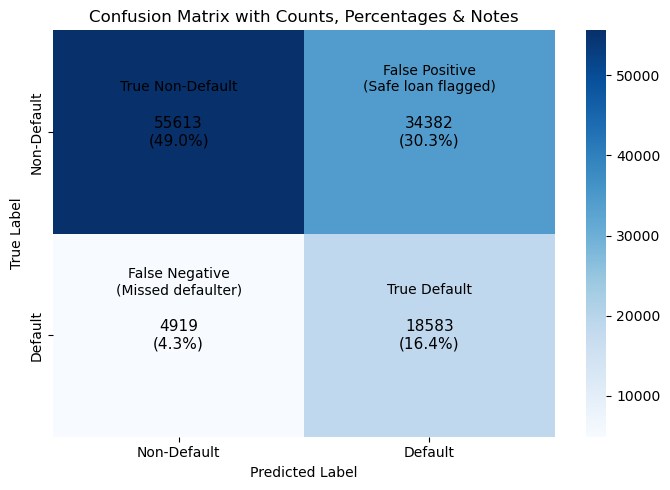

AUC Score: 0.7790


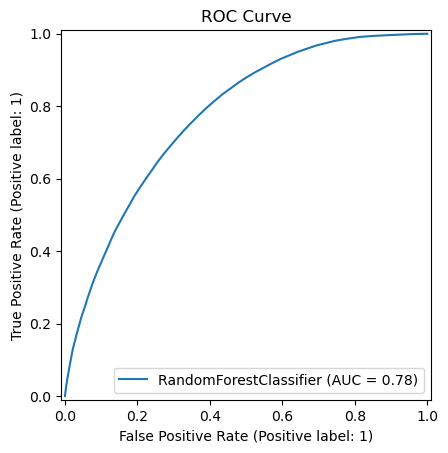

In [271]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Classification Report
# ---------------------------
print(f"Classification report Class Weighted Model at threshold {threshold}:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_custom))

# ---------------------------
# 2. Confusion Matrix with % and Notes
# ---------------------------
cm = confusion_matrix(y_test, y_pred_custom)
labels = ['Non-Default', 'Default']
total = np.sum(cm)

# Calculate percentages
cm_percent = cm / total * 100
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = cm_percent[i, j]
        annot[i, j] = f"{count}\n({percent:.1f}%)"

plt.figure(figsize=(7, 5))
ax = sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
                 xticklabels=labels, yticklabels=labels,
                 annot_kws={"color": "black", "fontsize": 11})

# Add labels and title
plt.title("Confusion Matrix with Counts, Percentages & Notes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add in-plot explanations for each quadrant
ax.text(0.5, 0.3, 'True Non-Default', color='black', ha='center', fontsize=10)
ax.text(1.5, 0.3, 'False Positive\n(Safe loan flagged)', color='black', ha='center', fontsize=10)
ax.text(0.5, 1.3, 'False Negative\n(Missed defaulter)', color='black', ha='center', fontsize=10)
ax.text(1.5, 1.3, 'True Default', color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ---------------------------
# 3. AUC Score
# ---------------------------
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# ---------------------------
# 4. ROC Curve
# ---------------------------
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


### 4. Plot Metrics for Multiple Thresholds

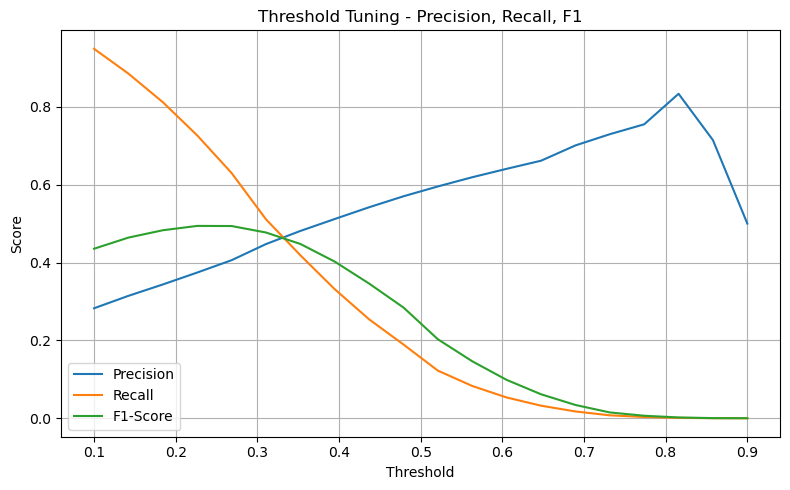

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0.1, 0.9, 20)
precision = []
recall = []
f1 = []

for t in thresholds:
    y_t = (y_proba >= t).astype(int)
    precision.append(precision_score(y_test, y_t))
    recall.append(recall_score(y_test, y_t))
    f1.append(f1_score(y_test, y_t))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, f1, label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning - Precision, Recall, F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="line-height: 1.6;">
To enhance the model’s ability to detect loan defaults, we performed threshold tuning by analyzing the trade-off between precision, recall, and F1-score across a range of classification thresholds. While the default threshold of 0.5 yielded high precision, it resulted in very low recall — meaning the model failed to identify a large number of actual defaults, which is undesirable for risk management purposes.
</div>
<br>
<div style="line-height: 1.6;">
As illustrated in the Precision-Recall-F1 plot, the F1-score peaks around a threshold of 0.25–0.3, suggesting an optimal balance between catching defaulters and minimizing false alarms. However, to further prioritize the identification of defaults, we intentionally selected a lower threshold of 0.2. This more conservative strategy increases the recall rate, allowing the model to capture more actual defaulters — even at the cost of reduced precision.
</div>
<br>
<div style="line-height: 1.6;">
By lowering the threshold to 0.2, we accept a higher number of false positives in exchange for better coverage of risky loans. This approach aligns with the goal of minimizing missed defaulters, especially in financial settings where failing to flag high-risk loans may carry higher costs than mistakenly flagging safe ones.

# Features Importance

/var/folders/s2/tz7cg94n5nngwr90gn5nnjjw0000gn/T/ipykernel_24593/2585046096.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')


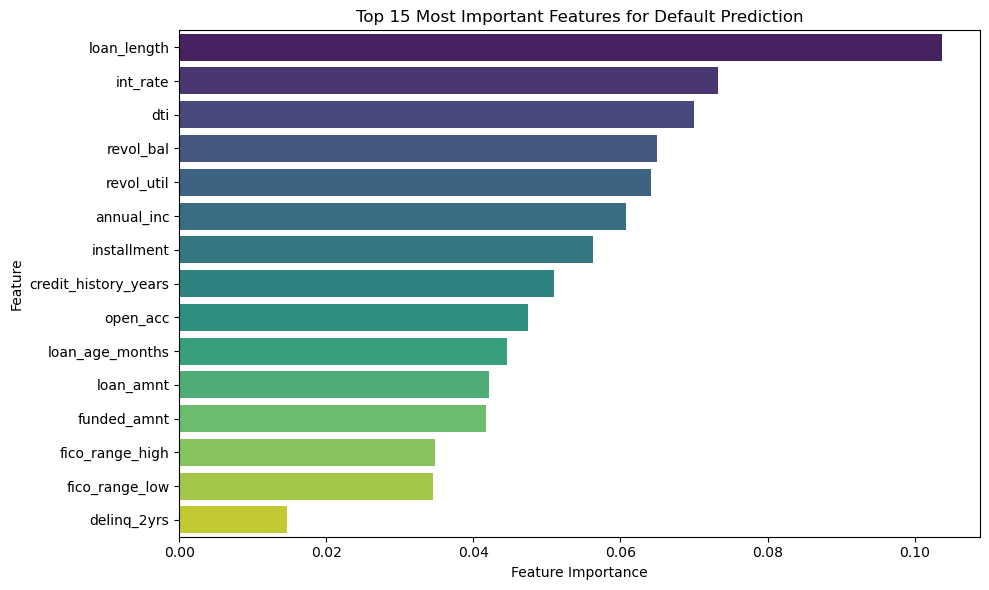

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_

# Get corresponding feature names from X
feature_names = X.columns

# Create a DataFrame for easier viewing
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for Default Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()